## Setup and configs

 good artcle https://www.techbriefs.com/component/content/article/tb/techbriefs/information-sciences/13857?start=1


In [1]:
import numpy as np
import json
from os import listdir,getcwd,chdir

from os.path import isfile,join
import sys
sys.path.append(join(getcwd(),'src\compression_funcs'))
sys.path.append(join(getcwd(),'src\DataLoader'))
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import chebyshev_compression as cheb
import Adaptive_chebyshev_tests as cheb_tests
#import Company_Loader as company_data_loader
import MIT_BIH_Loader as ecg_data_loader
import REDD_Loader as power_data_loader
import scipy

getcwd()

'/Users/abdel/PycharmProjects/cor-space-config/other-compressions/Adaptive-Chebyshev-Compression-master_archived/notebooks'

In [2]:
%matplotlib inline

In [3]:
company_path_bin = join(getcwd(),r'Data/TheCompany')
company_path_csv = join(getcwd(),r'Data/TheCompany/csv/temp_company.csv')

mit_bih_csv = join(getcwd(),r'../Data/MIT_BIH_CSV') 

gas_path_bin = join(getcwd(),r'../Data/GAS')

REDD_path_csv = join(getcwd(),r'../Data/REDD')

external_csv = join(getcwd(),'../Data/EXTERN')

data_path = mit_bih_csv

In [20]:
#raw_data = ecg_data_loader.load_data(data_path)
raw_data = pd.read_csv('../../../DATASETS/20160930_203718.csv')
#plt.plot(raw_data[:10])
##plt.title('Sanity check total sample {0}'.format(raw_data.shape[0]))
print(raw_data.shape)

(295718, 15)


In [21]:
def calc_stats(coefs,orignal,reconstrcuted):
    dict_toReturn = {
        "block_size:":len(orignal),
        "num of zeros in coefs":np.size((np.where(coefs == 0))),
        "loss norm2":np.linalg.norm(reconstrcuted-orignal),
        "loss factor":(np.std(reconstrcuted) - np.std(orignal)) / np.std(orignal),
        "compression gain":float(len(orignal))/(len(orignal)-np.size((np.where(coefs == 0))))
    }
   
    return dict_toReturn

def print_lot_statistics(coefs,orignal,reconstrcuted):
    #statistics
    dict_toReturn = calc_stats(coefs,orignal,reconstrcuted)
    print (dict_toReturn)

    #plot
    plt.plot(orignal)
    plt.plot(reconstrcuted)
    plt.legend(('original', 'decompressed'))
    plt.title('Compressed vs decompressed block_size {0}'.format(i))
    plt.show()

    plt.plot(coefs)
    plt.title('coeficient. count={0}'.format(len(coefs)))
    plt.show()
    return dict_toReturn

## DCT - RAW

{'block_size:': 512, 'num of zeros in coefs': 0, 'loss norm2': 2813.9390960947144, 'loss factor': 0.8993    78.303738
0.2231     0.311803
0.6365     0.047540
1.1493    -0.045089
0.8483     1.348750
1.2534     0.090039
1.4449     0.016496
1.9906     0.013576
1.3303     0.133687
1.448      0.520894
1.9148     0.016419
3.4651     0.006412
5.2144     0.150143
6.5806     0.290270
8.6385    -0.064987
dtype: float64, 'compression gain': 1.0}


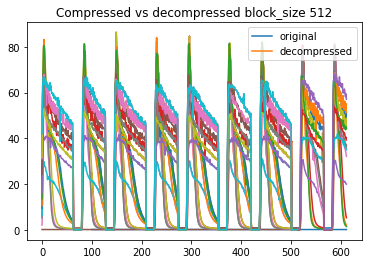

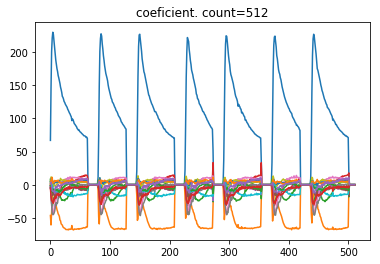

{'block_size:': 512,
 'num of zeros in coefs': 0,
 'loss norm2': 2813.9390960947144,
 'loss factor': 0.8993    78.303738
 0.2231     0.311803
 0.6365     0.047540
 1.1493    -0.045089
 0.8483     1.348750
 1.2534     0.090039
 1.4449     0.016496
 1.9906     0.013576
 1.3303     0.133687
 1.448      0.520894
 1.9148     0.016419
 3.4651     0.006412
 5.2144     0.150143
 6.5806     0.290270
 8.6385    -0.064987
 dtype: float64,
 'compression gain': 1.0}

In [22]:
i=512
offset = 0
cheb_transform_sample = raw_data[offset:offset+i]

coefs = scipy.fftpack.dct(cheb_transform_sample,norm = 'ortho')
company_cheb_transform_sample_reconstructed = scipy.fftpack.idct(coefs,norm = 'ortho')

print_lot_statistics(coefs,company_cheb_transform_sample,company_cheb_transform_sample_reconstructed)

## Chebyshev transform

{'block_size:': 512, 'num of zeros in coefs': 0, 'loss norm2': 8.531390085348717e-13, 'loss factor': 0.8993    78.733617
0.2231     0.318914
0.6365     0.053218
1.1493    -0.039913
0.8483     1.361482
1.2534     0.095948
1.4449     0.022006
1.9906     0.019070
1.3303     0.139832
1.448      0.529139
1.9148     0.021929
3.4651     0.011867
5.2144     0.156377
6.5806     0.297264
8.6385    -0.059919
dtype: float64, 'compression gain': 1.0}


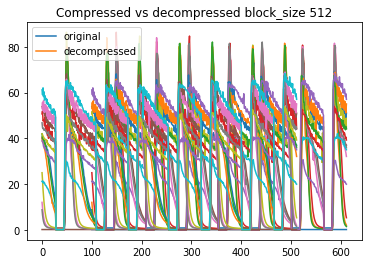

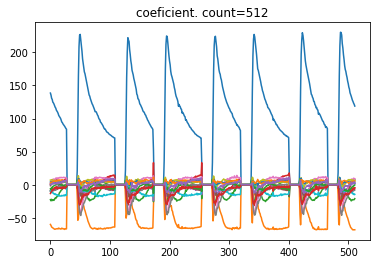

{'block_size:': 512,
 'num of zeros in coefs': 0,
 'loss norm2': 8.531390085348717e-13,
 'loss factor': 0.8993    78.733617
 0.2231     0.318914
 0.6365     0.053218
 1.1493    -0.039913
 0.8483     1.361482
 1.2534     0.095948
 1.4449     0.022006
 1.9906     0.019070
 1.3303     0.139832
 1.448      0.529139
 1.9148     0.021929
 3.4651     0.011867
 5.2144     0.156377
 6.5806     0.297264
 8.6385    -0.059919
 dtype: float64,
 'compression gain': 1.0}

In [23]:
#Sample a subset data
i=512
offset = 100
company_cheb_transform_sample = raw_data[offset:offset+i]

# chebyshev transofrm and back

import time 
start = time.time()
coefs,sample_size= cheb.block_compress(company_cheb_transform_sample)
company_cheb_transform_sample_reconstructed = cheb.block_decompress(coefs)
end = time.time()

#print plot statistics
print_lot_statistics(coefs,company_cheb_transform_sample,company_cheb_transform_sample_reconstructed)

## Chebyshev transform threshold retain

In [24]:
def evaluate_chebysehv(company_cheb_transform_sample_thres,threshold_idx=-1,print_stats=False):
    # chebyshev transofrm and back
   
    coefs,sample_size= cheb.block_compress(company_cheb_transform_sample_thres)
    
    #if threshold_idx>-1:
    #    threshold = sorted(np.abs(coefs))[threshold_idx]
    #    coefs = np.where(np.abs(coefs)>threshold,coefs,0)

    company_cheb_transform_sample_thres_reconstructed = cheb.block_decompress(coefs)
    #print plot statistics
    if print_stats:
        return print_lot_statistics(coefs,company_cheb_transform_sample_thres,company_cheb_transform_sample_thres_reconstructed)
    else:
        return calc_stats(coefs,company_cheb_transform_sample_thres,company_cheb_transform_sample_thres_reconstructed)


{'block_size:': 20, 'num of zeros in coefs': 0, 'loss norm2': 2.306114571710382e-13, 'loss factor': 0.8993    146.671412
0.2231      0.139442
0.6365     -0.094074
1.1493     -0.010112
0.8483      2.056787
1.2534      0.168839
1.4449      0.118640
1.9906      0.127570
1.3303      0.592198
1.448       1.252807
1.9148      0.435569
3.4651      0.562284
5.2144      0.744849
6.5806      1.258246
8.6385      0.728317
dtype: float64, 'compression gain': 1.0}


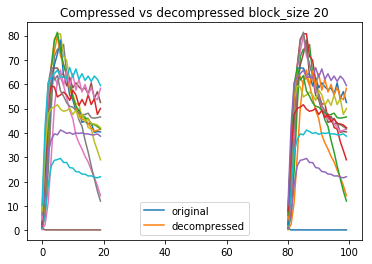

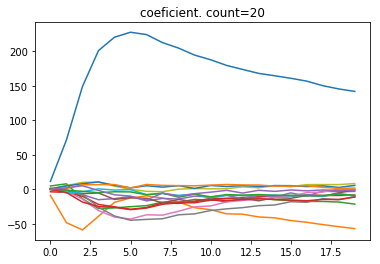

{'block_size:': 20,
 'num of zeros in coefs': 0,
 'loss norm2': 2.306114571710382e-13,
 'loss factor': 0.8993    146.671412
 0.2231      0.139442
 0.6365     -0.094074
 1.1493     -0.010112
 0.8483      2.056787
 1.2534      0.168839
 1.4449      0.118640
 1.9906      0.127570
 1.3303      0.592198
 1.448       1.252807
 1.9148      0.435569
 3.4651      0.562284
 5.2144      0.744849
 6.5806      1.258246
 8.6385      0.728317
 dtype: float64,
 'compression gain': 1.0}

In [25]:
#Sample a subset data
offset = 80
i=20
company_cheb_transform_sample_thres = raw_data[offset:offset+i]
evaluate_chebysehv(company_cheb_transform_sample_thres,100,True)

In [26]:
pd.DataFrame(raw_data[offset:offset+i]).to_csv('ecg_temp.csv')

In [27]:
print(end-start)

0.0004119873046875


## Sliding Chebyshev

In [12]:

cheb_tests.Sens_Test_Automatic('ecg_temp.csv')

KeyError: '0'

## IoT Data Compression Sensor - Agnostic Approach ##
https://ieeexplore-ieee-org.ezprimo1.idc.ac.il/stamp/stamp.jsp?arnumber=7149287

https://infoscience.epfl.ch/record/181860/files/TKDE.pdf

https://infoscience.epfl.ch/record/181860/files/TKDE.pdf

https://www-user.tu-chemnitz.de/~potts/paper/sparse_Cheb.pdf

 - https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/20080009460.pdf
 